In [72]:
import pandas as pd

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import MaxPooling1D
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [73]:
#df=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')
#df.to_csv('shampoo.csv')
data=pd.read_csv('shampoo.csv')
print(data.columns)

Index(['Unnamed: 0', 'Month', 'Sales'], dtype='object')


In [47]:
n_timesteps=5
n_features=1
print("1d convolutions extract 1d patches and the patch matches to an output")
model=models.Sequential()
model.add(layers.Conv1D(64,kernel_size=2,activation='relu',input_shape=(n_timesteps,n_features)))

model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))



1d convolutions extract 1d patches and the patch matches to an output


In [56]:
#https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [63]:
#X=data.Sales.copy()
#y=data.Sales.rolling(5).mean().copy()

n_steps=5
X, y = split_sequence(data.Sales, n_steps)

X = X.reshape((X.shape[0], X.shape[1], n_features))
#X=X.values.reshape(X.shape[0],X.shape[1],1)

#print(X,y)

	# evaluate model

In [64]:
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
history=model.fit(X,y, epochs=1000, batch_size=64, verbose=1)

Epoch 1/1000
31/31 [==============================] - 0s 5ms/step - loss: 16514.2148 - acc: 0.0000e+00
Epoch 2/1000
31/31 [==============================] - 0s 32us/step - loss: 13374.2402 - acc: 0.0000e+00
Epoch 3/1000
31/31 [==============================] - 0s 65us/step - loss: 10791.9727 - acc: 0.0000e+00
Epoch 4/1000
31/31 [==============================] - 0s 97us/step - loss: 8885.1123 - acc: 0.0000e+00
Epoch 5/1000
31/31 [==============================] - 0s 97us/step - loss: 7522.1338 - acc: 0.0000e+00
Epoch 6/1000
31/31 [==============================] - 0s 97us/step - loss: 6481.4336 - acc: 0.0000e+00
Epoch 7/1000
31/31 [==============================] - 0s 194us/step - loss: 5762.8408 - acc: 0.0000e+00
Epoch 8/1000
31/31 [==============================] - 0s 129us/step - loss: 5366.9102 - acc: 0.0000e+00
Epoch 9/1000
31/31 [==============================] - 0s 97us/step - loss: 5255.5654 - acc: 0.0000e+00
Epoch 10/1000
31/31 [==============================] - 0s 97us/step -

Epoch 80/1000
31/31 [==============================] - 0s 97us/step - loss: 4516.4512 - acc: 0.0000e+00
Epoch 81/1000
31/31 [==============================] - 0s 97us/step - loss: 4504.2998 - acc: 0.0000e+00
Epoch 82/1000
31/31 [==============================] - 0s 65us/step - loss: 4491.8032 - acc: 0.0000e+00
Epoch 83/1000
31/31 [==============================] - 0s 0us/step - loss: 4479.4302 - acc: 0.0000e+00
Epoch 84/1000
31/31 [==============================] - 0s 97us/step - loss: 4467.2524 - acc: 0.0000e+00
Epoch 85/1000
31/31 [==============================] - 0s 65us/step - loss: 4454.9517 - acc: 0.0000e+00
Epoch 86/1000
31/31 [==============================] - 0s 7us/step - loss: 4442.7686 - acc: 0.0000e+00
Epoch 87/1000
31/31 [==============================] - 0s 281us/step - loss: 4430.3809 - acc: 0.0000e+00
Epoch 88/1000
31/31 [==============================] - 0s 65us/step - loss: 4417.6802 - acc: 0.0000e+00
Epoch 89/1000
31/31 [==============================] - 0s 65us/st

Epoch 159/1000
31/31 [==============================] - 0s 32us/step - loss: 3329.4524 - acc: 0.0000e+00
Epoch 160/1000
31/31 [==============================] - 0s 32us/step - loss: 3317.5872 - acc: 0.0000e+00
Epoch 161/1000
31/31 [==============================] - 0s 64us/step - loss: 3306.1606 - acc: 0.0000e+00
Epoch 162/1000
31/31 [==============================] - 0s 65us/step - loss: 3293.1406 - acc: 0.0000e+00
Epoch 163/1000
31/31 [==============================] - 0s 32us/step - loss: 3281.2563 - acc: 0.0000e+00
Epoch 164/1000
31/31 [==============================] - 0s 65us/step - loss: 3270.2639 - acc: 0.0000e+00
Epoch 165/1000
31/31 [==============================] - 0s 97us/step - loss: 3258.9048 - acc: 0.0000e+00
Epoch 166/1000
31/31 [==============================] - 0s 64us/step - loss: 3246.5403 - acc: 0.0000e+00
Epoch 167/1000
31/31 [==============================] - 0s 32us/step - loss: 3234.4592 - acc: 0.0000e+00
Epoch 168/1000
31/31 [==============================] -

Epoch 238/1000
31/31 [==============================] - 0s 65us/step - loss: 2706.0950 - acc: 0.0000e+00
Epoch 239/1000
31/31 [==============================] - 0s 32us/step - loss: 2701.8025 - acc: 0.0000e+00
Epoch 240/1000
31/31 [==============================] - 0s 32us/step - loss: 2696.7659 - acc: 0.0000e+00
Epoch 241/1000
31/31 [==============================] - 0s 97us/step - loss: 2692.0967 - acc: 0.0000e+00
Epoch 242/1000
31/31 [==============================] - 0s 65us/step - loss: 2688.2468 - acc: 0.0000e+00
Epoch 243/1000
31/31 [==============================] - 0s 33us/step - loss: 2682.9241 - acc: 0.0000e+00
Epoch 244/1000
31/31 [==============================] - 0s 65us/step - loss: 2679.0066 - acc: 0.0000e+00
Epoch 245/1000
31/31 [==============================] - 0s 65us/step - loss: 2675.2163 - acc: 0.0000e+00
Epoch 246/1000
31/31 [==============================] - 0s 65us/step - loss: 2668.7693 - acc: 0.0000e+00
Epoch 247/1000
31/31 [==============================] -

Epoch 317/1000
31/31 [==============================] - 0s 65us/step - loss: 2327.4014 - acc: 0.0000e+00
Epoch 318/1000
31/31 [==============================] - 0s 97us/step - loss: 2323.5286 - acc: 0.0000e+00
Epoch 319/1000
31/31 [==============================] - 0s 64us/step - loss: 2316.4275 - acc: 0.0000e+00
Epoch 320/1000
31/31 [==============================] - 0s 64us/step - loss: 2316.8162 - acc: 0.0000e+00
Epoch 321/1000
31/31 [==============================] - 0s 65us/step - loss: 2309.4924 - acc: 0.0000e+00
Epoch 322/1000
31/31 [==============================] - 0s 65us/step - loss: 2305.4199 - acc: 0.0000e+00
Epoch 323/1000
31/31 [==============================] - 0s 64us/step - loss: 2302.1472 - acc: 0.0000e+00
Epoch 324/1000
31/31 [==============================] - 0s 33us/step - loss: 2295.0369 - acc: 0.0000e+00
Epoch 325/1000
31/31 [==============================] - 0s 65us/step - loss: 2291.4265 - acc: 0.0000e+00
Epoch 326/1000
31/31 [==============================] -

Epoch 396/1000
31/31 [==============================] - 0s 64us/step - loss: 1985.4207 - acc: 0.0000e+00
Epoch 397/1000
31/31 [==============================] - 0s 97us/step - loss: 1984.7467 - acc: 0.0000e+00
Epoch 398/1000
31/31 [==============================] - 0s 32us/step - loss: 1976.8124 - acc: 0.0000e+00
Epoch 399/1000
31/31 [==============================] - 0s 32us/step - loss: 1973.4133 - acc: 0.0000e+00
Epoch 400/1000
31/31 [==============================] - 0s 32us/step - loss: 1969.3163 - acc: 0.0000e+00
Epoch 401/1000
31/31 [==============================] - 0s 96us/step - loss: 1964.3807 - acc: 0.0000e+00
Epoch 402/1000
31/31 [==============================] - 0s 32us/step - loss: 1964.0692 - acc: 0.0000e+00
Epoch 403/1000
31/31 [==============================] - 0s 65us/step - loss: 1956.4469 - acc: 0.0000e+00
Epoch 404/1000
31/31 [==============================] - 0s 64us/step - loss: 1953.3606 - acc: 0.0000e+00
Epoch 405/1000
31/31 [==============================] -

Epoch 475/1000
31/31 [==============================] - 0s 64us/step - loss: 1695.4083 - acc: 0.0000e+00
Epoch 476/1000
31/31 [==============================] - 0s 32us/step - loss: 1691.1626 - acc: 0.0000e+00
Epoch 477/1000
31/31 [==============================] - 0s 32us/step - loss: 1689.3639 - acc: 0.0000e+00
Epoch 478/1000
31/31 [==============================] - 0s 97us/step - loss: 1685.0105 - acc: 0.0000e+00
Epoch 479/1000
31/31 [==============================] - 0s 97us/step - loss: 1681.1533 - acc: 0.0000e+00
Epoch 480/1000
31/31 [==============================] - 0s 32us/step - loss: 1678.5214 - acc: 0.0000e+00
Epoch 481/1000
31/31 [==============================] - 0s 65us/step - loss: 1674.7202 - acc: 0.0000e+00
Epoch 482/1000
31/31 [==============================] - 0s 64us/step - loss: 1676.2290 - acc: 0.0000e+00
Epoch 483/1000
31/31 [==============================] - 0s 32us/step - loss: 1673.0306 - acc: 0.0000e+00
Epoch 484/1000
31/31 [==============================] -

Epoch 554/1000
31/31 [==============================] - 0s 65us/step - loss: 1464.2808 - acc: 0.0000e+00
Epoch 555/1000
31/31 [==============================] - 0s 96us/step - loss: 1465.4346 - acc: 0.0000e+00
Epoch 556/1000
31/31 [==============================] - 0s 32us/step - loss: 1459.0767 - acc: 0.0000e+00
Epoch 557/1000
31/31 [==============================] - 0s 65us/step - loss: 1458.3228 - acc: 0.0000e+00
Epoch 558/1000
31/31 [==============================] - 0s 33us/step - loss: 1457.2313 - acc: 0.0000e+00
Epoch 559/1000
31/31 [==============================] - 0s 65us/step - loss: 1452.9224 - acc: 0.0000e+00
Epoch 560/1000
31/31 [==============================] - 0s 65us/step - loss: 1451.0861 - acc: 0.0000e+00
Epoch 561/1000
31/31 [==============================] - 0s 64us/step - loss: 1447.9510 - acc: 0.0000e+00
Epoch 562/1000
31/31 [==============================] - 0s 32us/step - loss: 1444.9609 - acc: 0.0000e+00
Epoch 563/1000
31/31 [==============================] -

Epoch 633/1000
31/31 [==============================] - 0s 32us/step - loss: 1287.1641 - acc: 0.0000e+00
Epoch 634/1000
31/31 [==============================] - 0s 97us/step - loss: 1291.1135 - acc: 0.0000e+00
Epoch 635/1000
31/31 [==============================] - 0s 64us/step - loss: 1282.8849 - acc: 0.0000e+00
Epoch 636/1000
31/31 [==============================] - 0s 32us/step - loss: 1280.5961 - acc: 0.0323
Epoch 637/1000
31/31 [==============================] - 0s 97us/step - loss: 1281.2760 - acc: 0.0323
Epoch 638/1000
31/31 [==============================] - 0s 97us/step - loss: 1271.9832 - acc: 0.0000e+00
Epoch 639/1000
31/31 [==============================] - 0s 32us/step - loss: 1274.8566 - acc: 0.0000e+00
Epoch 640/1000
31/31 [==============================] - 0s 65us/step - loss: 1274.4525 - acc: 0.0000e+00
Epoch 641/1000
31/31 [==============================] - 0s 65us/step - loss: 1268.9282 - acc: 0.0000e+00
Epoch 642/1000
31/31 [==============================] - 0s 32us

Epoch 712/1000
31/31 [==============================] - 0s 65us/step - loss: 1100.5249 - acc: 0.0000e+00
Epoch 713/1000
31/31 [==============================] - 0s 64us/step - loss: 1090.8561 - acc: 0.0323
Epoch 714/1000
31/31 [==============================] - 0s 32us/step - loss: 1093.0767 - acc: 0.0000e+00
Epoch 715/1000
31/31 [==============================] - 0s 32us/step - loss: 1091.1637 - acc: 0.0000e+00
Epoch 716/1000
31/31 [==============================] - 0s 97us/step - loss: 1085.4875 - acc: 0.0323
Epoch 717/1000
31/31 [==============================] - 0s 65us/step - loss: 1086.4484 - acc: 0.0000e+00
Epoch 718/1000
31/31 [==============================] - 0s 64us/step - loss: 1079.4347 - acc: 0.0323
Epoch 719/1000
31/31 [==============================] - 0s 63us/step - loss: 1079.1299 - acc: 0.0000e+00
Epoch 720/1000
31/31 [==============================] - 0s 63us/step - loss: 1077.4600 - acc: 0.0323
Epoch 721/1000
31/31 [==============================] - 0s 64us/step - 

Epoch 792/1000
31/31 [==============================] - 0s 65us/step - loss: 904.9941 - acc: 0.0000e+00
Epoch 793/1000
31/31 [==============================] - 0s 31us/step - loss: 912.2848 - acc: 0.0000e+00
Epoch 794/1000
31/31 [==============================] - 0s 63us/step - loss: 906.3999 - acc: 0.0000e+00
Epoch 795/1000
31/31 [==============================] - 0s 65us/step - loss: 906.3454 - acc: 0.0000e+00
Epoch 796/1000
31/31 [==============================] - 0s 65us/step - loss: 909.0827 - acc: 0.0000e+00
Epoch 797/1000
31/31 [==============================] - 0s 65us/step - loss: 898.5104 - acc: 0.0000e+00
Epoch 798/1000
31/31 [==============================] - 0s 64us/step - loss: 908.9477 - acc: 0.0000e+00
Epoch 799/1000
31/31 [==============================] - 0s 65us/step - loss: 902.6078 - acc: 0.0000e+00
Epoch 800/1000
31/31 [==============================] - 0s 64us/step - loss: 896.6388 - acc: 0.0000e+00
Epoch 801/1000
31/31 [==============================] - 0s 32us/

Epoch 871/1000
31/31 [==============================] - 0s 64us/step - loss: 776.8046 - acc: 0.0000e+00
Epoch 872/1000
31/31 [==============================] - 0s 32us/step - loss: 778.1605 - acc: 0.0000e+00
Epoch 873/1000
31/31 [==============================] - 0s 32us/step - loss: 775.1546 - acc: 0.0000e+00
Epoch 874/1000
31/31 [==============================] - 0s 32us/step - loss: 775.3521 - acc: 0.0000e+00
Epoch 875/1000
31/31 [==============================] - 0s 32us/step - loss: 774.0294 - acc: 0.0000e+00
Epoch 876/1000
31/31 [==============================] - 0s 32us/step - loss: 768.5135 - acc: 0.0000e+00
Epoch 877/1000
31/31 [==============================] - 0s 64us/step - loss: 772.5960 - acc: 0.0000e+00
Epoch 878/1000
31/31 [==============================] - 0s 32us/step - loss: 770.0656 - acc: 0.0000e+00
Epoch 879/1000
31/31 [==============================] - 0s 64us/step - loss: 772.7452 - acc: 0.0000e+00
Epoch 880/1000
31/31 [==============================] - 0s 97us/

Epoch 950/1000
31/31 [==============================] - 0s 161us/step - loss: 703.1298 - acc: 0.0000e+00
Epoch 951/1000
31/31 [==============================] - 0s 65us/step - loss: 688.7263 - acc: 0.0000e+00
Epoch 952/1000
31/31 [==============================] - 0s 65us/step - loss: 699.6581 - acc: 0.0000e+00
Epoch 953/1000
31/31 [==============================] - 0s 63us/step - loss: 686.5765 - acc: 0.0000e+00
Epoch 954/1000
31/31 [==============================] - 0s 97us/step - loss: 689.4269 - acc: 0.0000e+00
Epoch 955/1000
31/31 [==============================] - 0s 64us/step - loss: 682.4885 - acc: 0.0000e+00
Epoch 956/1000
31/31 [==============================] - 0s 161us/step - loss: 694.1576 - acc: 0.0000e+00
Epoch 957/1000
31/31 [==============================] - 0s 65us/step - loss: 691.7562 - acc: 0.0000e+00
Epoch 958/1000
31/31 [==============================] - 0s 33us/step - loss: 685.7935 - acc: 0.0000e+00
Epoch 959/1000
31/31 [==============================] - 0s 97u

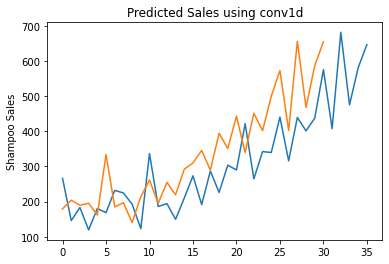

In [66]:
      
y_pred=model.predict(X).flatten()           

data.Sales.plot()
plt.plot(y_pred)
plt.title('Predicted Sales using conv1d')
plt.ylabel("Shampoo Sales")
plt.show()

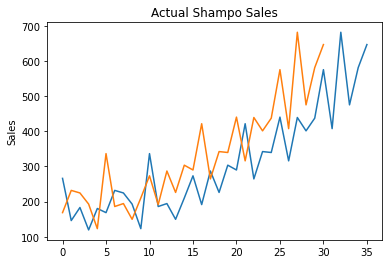

In [67]:
data.Sales.plot()
plt.plot(y)
plt.title("Actual Shampo Sales")
plt.ylabel("Sales")
plt.show()

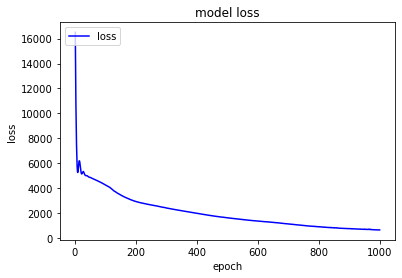

In [71]:
# summarize history for loss
hist_dict=history.history
epochs=range(1,len(hist_dict['loss'])+1)
#print(hist_dict)
plt.plot(epochs,hist_dict['loss'],'b',label='loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()